In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130911 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [2]:
# 查看初始文件夹和当前位置
!ls
!pwd

adc.json  sample_data
/content


In [3]:
# 挂载谷歌云盘
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls
!ls -al drive/

adc.json  drive  sample_data
total 47801
drwxr-xr-x 2 root root     4096 May 31 15:18 .
drwxr-xr-x 1 root root     4096 May 31 15:18 ..
drwxr-xr-x 2 root root     4096 May 31 10:46 fastai
-r--r--r-- 1 root root 48877195 Apr 22 09:48 go-common-master.zip
drwxr-xr-x 2 root root     4096 May 31 10:45 kaggle
-rw-r--r-- 1 root root    45332 May 31 15:18 nerve.ipynb
dr-xr-xr-x 2 root root     4096 May 31 15:18 .Trash


In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

import os
import json
import shutil
import zipfile

%reload_ext autoreload
%autoreload 2
%matplotlib inline

root_dir = '/content/'
base_dir = root_dir + 'pcam/'
temp_dir = '/content/drive/'
!mkdir -p "{base_dir}"
!mkdir -p "{temp_dir}"
!ls

adc.json  drive  pcam  sample_data


In [0]:
np.random.seed(2)

In [0]:
!cat ~/.kaggle/kaggle.json

cat: /root/.kaggle/kaggle.json: No such file or directory


In [6]:
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!echo '{"username":"telaluosifen","key":"a261d8097ff161ec422d973e220f03b6"}' > ~/.kaggle/kaggle.json
!cat ~/.kaggle/kaggle.json

{"username":"telaluosifen","key":"a261d8097ff161ec422d973e220f03b6"}


In [7]:
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 69 May 31 15:20 kaggle.json


In [8]:
!kaggle competitions download -c histopathologic-cancer-detection -p "{base_dir}" 

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 92.8MB/s]
  0% 0.00/5.10M [00:00<?, ?B/s]
100% 5.10M/5.10M [00:00<00:00, 46.9MB/s]
100% 1.30G/1.30G [00:13<00:00, 157MB/s]
100% 1.30G/1.30G [00:13<00:00, 107MB/s]
100% 4.98G/4.98G [00:58<00:00, 23.7MB/s]
100% 4.98G/4.98G [00:58<00:00, 92.0MB/s]


In [9]:
# unzip train file
!mkdir -p "{base_dir}train/" 
dest_dir_train = Path(base_dir + 'train/')
print(base_dir + 'train')
train_zip = zipfile.ZipFile(base_dir + 'train.zip', 'r')
train_zip.extractall(dest_dir_train)
train_zip.close()

/content/pcam/train


In [10]:
# unzip test file
!mkdir -p "{base_dir}test/"
dest_dir_test = Path(base_dir + 'test/')
print(base_dir + 'test')
test_zip = zipfile.ZipFile(base_dir + 'test.zip', 'r')
test_zip.extractall(dest_dir_test)
test_zip.close()

/content/pcam/test


In [16]:
# extract train label
dest_dir_csv = Path(base_dir)
print(base_dir + 'train_labels.csv')
label_csv_zip = zipfile.ZipFile(base_dir + 'train_labels.csv.zip', 'r')
label_csv_zip.extractall(dest_dir_csv)
label_csv_zip.close()
# !mv ./pcam/train_labels.csv ./drive

/content/pcam/train_labels.csv


In [17]:
# extract sample label
dest_dir_csv = Path(base_dir)
print(base_dir + 'sample_submission.csv')
label_csv_zip = zipfile.ZipFile(base_dir + 'sample_submission.csv.zip', 'r')
label_csv_zip.extractall(dest_dir_csv)
label_csv_zip.close()
# !mv ./pcam/sample_submission.csv ./drive

/content/pcam/sample_submission.csv


In [13]:
# check download 
path = Path(base_dir)
path.ls()

[PosixPath('/content/pcam/train.zip'),
 PosixPath('/content/pcam/train_labels.csv.zip'),
 PosixPath('/content/pcam/test.zip'),
 PosixPath('/content/pcam/test'),
 PosixPath('/content/pcam/train'),
 PosixPath('/content/pcam/sample_submission.csv.zip')]

In [0]:
tfms = get_transforms(do_flip=True, flip_vert=True)

In [0]:
bs = 64
data = ImageDataBunch.from_csv(
    base_dir,
    ds_tfms = tfms,
    size = 224,
    suffix = ".tif",
    folder = "train",
    test = "test",
    csv_labels = "train_labels.csv",
    bs=bs)

In [19]:
# normalise the image
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (176020 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,0,0,1,1
Path: /content/pcam;

Valid: LabelList (44005 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,1,1,1
Path: /content/pcam;

Test: LabelList (57458 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/pcam

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, callback_fns=ShowGraph).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 17631820.12it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


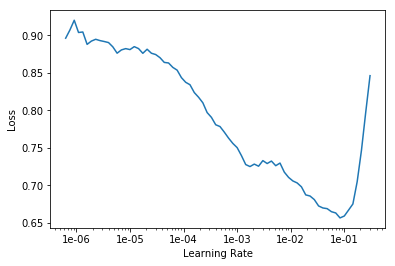

In [21]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(30,slice(1e-02))
learn.save(base_dir + 'pcamv4-stage-1')
!cp ./pcam/pcamv4-stage-1 ./drive

epoch,train_loss,valid_loss,error_rate,time


In [0]:
preds, y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc*100))

In [0]:
interp = ClassificationInterpretation.form_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [0]:
interp.plot_top_losses(16, figsize=(16,16))

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(30, max_lr=slice(1e-5, 1e-4))
learn.save(base_dir + 'pcamv4-stage-2')
!cp ./pcam/pcamv4-stage-2 ./drive

In [0]:
preds, y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc*100))

In [0]:
interp = ClassificationInterpretation.form_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(16, figsize=(16,16))